# Table of Contents

1. Import Libraries and Data
2. Address PII in the Data
3. Check Data Prior to Creating a New Column
4. Create a new column in the Dataframe to compare geographic areas
5. Create an exclusion flag for low-activity customers and exclude them from the dataframe
6. Create profiling variables for the marketing unit
7. Visualize the distribution of the profile variables and compare the profiles with regions and departments to look for correlations
8. Export the visualizations
9. Export the final data

## Import Libraries and Data

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os

In [2]:
#Import Data
path= r'C:\Users\Zinnia\Documents\Career Foundry Data Analytics Course\Achievement 4\A4 Project'

In [3]:
#Import Pickle File
ords_prods_merge=pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
ords_prods_merge.shape

(32640698, 36)

In [5]:
#Pull up list of columns in dataset
ords_prods_merge.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest day', 'busiest days of the week',
       'busiest hours of the day', 'max_order', 'loyalty_flag',
       'users_average_order', 'spending_flag', 'users_days_since_order',
       'Order_frequency_flag', 'First Name', 'Last_Name', 'Gender', 'State',
       'Age', 'date_joined', 'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

2. Address PII data before continuing
In this instance it would make sense to publish a dataset without the PII information (exclude ‘First Name’ ‘Last Name’ columns). Other things we'd exclude if they were stored are addresses, phone numbers, and emails. 


## Addressing PII in the Data

In [6]:
#Remove columns with PII by creating a new dataset without those columns
orders_prods_all=ords_prods_merge.drop(columns=['First Name', 'Last_Name'])

The first name and last name were removed as those are personally identifiable information

In [7]:
#Confirm that columns are no longer present in dataset
orders_prods_all.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest day', 'busiest days of the week',
       'busiest hours of the day', 'max_order', 'loyalty_flag',
       'users_average_order', 'spending_flag', 'users_days_since_order',
       'Order_frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

## Check Data Prior to Creating a New Column

In [8]:
#Check columns and data. Identify unnecessary column
orders_prods_all.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest day', 'busiest days of the week',
       'busiest hours of the day', 'max_order', 'loyalty_flag',
       'users_average_order', 'spending_flag', 'users_days_since_order',
       'Order_frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge'],
      dtype='object')

In [9]:
#Drop unnecessary column
orders_prods_all.drop(columns = ['Unnamed: 0']) 

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,users_days_since_order,Order_frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,True,196.0,1.0,...,20.145455,Non-frequent Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
1,2539329,1,prior,1,2,8,NaN,True,14084.0,2.0,...,20.145455,Non-frequent Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
2,2539329,1,prior,1,2,8,NaN,True,12427.0,3.0,...,20.145455,Non-frequent Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
3,2539329,1,prior,1,2,8,NaN,True,26088.0,4.0,...,20.145455,Non-frequent Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
4,2539329,1,prior,1,2,8,NaN,True,26405.0,5.0,...,20.145455,Non-frequent Customer,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32640693,2977660,206209,prior,13,1,12,7.0,False,38730.0,6.0,...,20.358974,Non-frequent Customer,Female,Iowa,74.0,9/14/2019,3.0,married,137969.0,both
32640694,2977660,206209,prior,13,1,12,7.0,False,31477.0,7.0,...,20.358974,Non-frequent Customer,Female,Iowa,74.0,9/14/2019,3.0,married,137969.0,both
32640695,2977660,206209,prior,13,1,12,7.0,False,6567.0,8.0,...,20.358974,Non-frequent Customer,Female,Iowa,74.0,9/14/2019,3.0,married,137969.0,both
32640696,2977660,206209,prior,13,1,12,7.0,False,22920.0,9.0,...,20.358974,Non-frequent Customer,Female,Iowa,74.0,9/14/2019,3.0,married,137969.0,both


In [10]:
#Pull up list of unique 'States' in State column
stateslist = orders_prods_all['State'].unique()
print(stateslist)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' nan]


In [11]:
#Identify problem- Nan values in State column of data
orders_prods_all['State'].value_counts(dropna=False)

NaN                     1788086
California               634762
Pennsylvania             634226
Rhode Island             625836
Georgia                  625107
Arizona                  624193
North Carolina           622468
Oklahoma                 619670
Minnesota                618070
New Mexico               615929
Maine                    614719
Alaska                   614591
Wyoming                  614208
Massachusetts            613417
Arkansas                 612395
Mississippi              611635
Texas                    610008
North Dakota             609608
Nevada                   609439
Missouri                 608756
Virginia                 608041
South Dakota             607119
Louisiana                606857
Alabama                  606748
Kansas                   606686
South Carolina           606491
New York                 605870
Washington               605749
Michigan                 605084
Montana                  605001
Kentucky                 604583
Colorado

In [12]:
# Find missing values
orders_prods_all.isnull().sum()

order_id                          0
user_id                           0
eval_set                          0
order_number                      0
orders_day_of_week                0
order_hour_of_day                 0
days_since_prior_order      2078068
first_order                       0
product_id                   206209
add_to_cart_order            206209
reordered                    206209
Unnamed: 0                   236409
product_name                 236409
aisle_id                     236409
department_id                236409
prices                       236409
price_range_loc              654087
busiest day                       0
busiest days of the week          0
busiest hours of the day          0
max_order                         0
loyalty_flag                      0
users_average_order               0
spending_flag                     0
users_days_since_order            0
Order_frequency_flag              0
Gender                      1788086
State                       

In [13]:
# Create a subset with the missing values in 'State'
df_nan = orders_prods_all[orders_prods_all['State'].isnull() == True]

In [14]:
df_nan

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,users_days_since_order,Order_frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,_merge
7792,817409,61,prior,1,2,11,NaN,True,46260.0,1.0,...,26.465517,Non-frequent Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7793,817409,61,prior,1,2,11,NaN,True,13490.0,2.0,...,26.465517,Non-frequent Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7794,817409,61,prior,1,2,11,NaN,True,38154.0,3.0,...,26.465517,Non-frequent Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7795,817409,61,prior,1,2,11,NaN,True,5097.0,4.0,...,26.465517,Non-frequent Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7796,817409,61,prior,1,2,11,NaN,True,47766.0,5.0,...,26.465517,Non-frequent Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32639342,1380497,206204,prior,4,4,15,25.0,False,30720.0,14.0,...,15.604167,Regular Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
32639343,1380497,206204,prior,4,4,15,25.0,False,49075.0,15.0,...,15.604167,Regular Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
32639344,1380497,206204,prior,4,4,15,25.0,False,32689.0,16.0,...,15.604167,Regular Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
32639345,1380497,206204,prior,4,4,15,25.0,False,30328.0,17.0,...,15.604167,Regular Customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [15]:
# Create a new data frame with clean data for 'State'
orders_prods_all_clean = orders_prods_all[orders_prods_all['State'].isnull() == False]

In [16]:
# Track number of rows in current data frame
orders_prods_all_clean.shape

(30852612, 34)

In [17]:
#Find counts of the number of customers in each state
orders_prods_all_clean['State'].value_counts(dropna=False)

California              634762
Pennsylvania            634226
Rhode Island            625836
Georgia                 625107
Arizona                 624193
North Carolina          622468
Oklahoma                619670
Minnesota               618070
New Mexico              615929
Maine                   614719
Alaska                  614591
Wyoming                 614208
Massachusetts           613417
Arkansas                612395
Mississippi             611635
Texas                   610008
North Dakota            609608
Nevada                  609439
Missouri                608756
Virginia                608041
South Dakota            607119
Louisiana               606857
Alabama                 606748
Kansas                  606686
South Carolina          606491
New York                605870
Washington              605749
Michigan                605084
Montana                 605001
Kentucky                604583
Colorado                604088
Oregon                  603647
Delaware

## Create a New 'Region' Column to compare geographic areas

In [18]:
# Divide the data into regions using the State column

result = []

for value in orders_prods_all['State']:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    result.append("Northeast")
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result.append("Midwest")
  elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia' , 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
    result.append("South")
  elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
    result.append("West")

In [19]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'We

In [20]:
# Add the Region column to the dataframe

orders_prods_all_clean['Region'] = result

C:\Users\Zinnia\AppData\Local\Temp/ipykernel_22460/3585610382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_prods_all_clean['Region'] = result


In [21]:
# Check 'Region' value counts

orders_prods_all_clean['Region'].value_counts(dropna = False)

South        10273278
West          7888635
Midwest       7228968
Northeast     5461731
Name: Region, dtype: int64

In [22]:
orders_prods_all_clean.shape

(30852612, 35)

In [23]:
# Determine whether there's a difference in spending habits by region

crosstab = pd.crosstab(orders_prods_all_clean['Region'], orders_prods_all_clean['spending_flag'], dropna = False)

In [24]:
crosstab

spending_flag,High Spender,Low Spender
Region,,
Midwest,151121,7077847
Northeast,102295,5359436
South,198405,10074873
West,149181,7739454


In [25]:
#Total by Region- Midwest
(151121+7077847)

7228968

In [26]:
#Total by Region- Northeast
(102295+5359436)

5461731

In [27]:
#Total by Region- South
(198405+10074873)

10273278

In [28]:
#Total by Region- West
(149181+7739454)

7888635

In [29]:
# High spender by region. Make a percentage since each population is different for comparison

Midwest_high = (151121/7228968)*100
Northeast_high = (102295/5461731)*100
South_high = (198405/10273278)*100
West_high = (149181/7888635)*100

In [30]:
#Print percentage results

Midwest_high,Northeast_high, South_high, West_high

(2.0904920315043585, 1.8729410144878975, 1.931272569475877, 1.8910876216227521)

In [31]:
#Low Spender by Region

Midwest_low = (7077847/7228968)*100
Northeast_low = (5359436/5461731)*100
South_low = (10074873/10273278)*100
West_low = (7739454/7888635)*100

In [32]:
Midwest_low,Northeast_low, South_low, West_low

(97.90950796849565, 98.12705898551211, 98.06872743052412, 98.10891237837724)

The data on spending by region shows that the Midwest has the largest percentage of high spenders at 2.09% and the Northeast has the lowest percentage of high spenders at 1.87%. The inverse would also be true. However, these are not large differences as they are all within a narrow range. 

## Exclude Low-Activity Customers from the dataframe with an exclusion flag

In [33]:
# Create a low-activity flag for customers with less than 5 orders

orders_prods_all_clean.loc[orders_prods_all_clean['max_order'] < 5, 'activity_flag'] = 'Low activity'

C:\Users\Zinnia\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Zinnia\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [34]:
# Create a low-activity flag for customers with more than 5 orders

orders_prods_all_clean.loc[orders_prods_all_clean['max_order'] >= 5, 'activity_flag'] = 'Normal activity'

In [35]:
orders_prods_all_clean['max_order'].value_counts(dropna = False)

100    1102025
7       782672
9       779730
10      774954
8       773334
        ...   
94       46813
91       45149
99       42544
98       41974
97       40523
Name: max_order, Length: 97, dtype: int64

In [36]:
# Checking values

orders_prods_all_clean['activity_flag'].value_counts(dropna = False)

Normal activity    30180048
Low activity         672564
Name: activity_flag, dtype: int64

In [37]:
# Creating df with only 'Low activity' customers

orders_prods_all_clean_low_act_customers = orders_prods_all_clean[orders_prods_all_clean['activity_flag']=='Low activity']

In [38]:
# Checking value count

orders_prods_all_clean_low_act_customers['max_order'].value_counts(dropna = False)

4    672564
Name: max_order, dtype: int64

In [39]:
#Make a new dataframe without the low spenders data

orders_prods_all_clean_normal_spenders= orders_prods_all_clean[orders_prods_all_clean['activity_flag']=='Normal activity']

In [40]:
# Checking value count

orders_prods_all_clean_normal_spenders['max_order'].value_counts(dropna = False)

100    1102025
7       782672
9       779730
10      774954
8       773334
        ...   
94       46813
91       45149
99       42544
98       41974
97       40523
Name: max_order, Length: 96, dtype: int64

In [41]:
#Export new dataframe to pickle file

orders_prods_all_clean_normal_spenders.to_pickle(os.path.join(path,'Data', 'Prepared Data', 'orders_prods_all_clean_normal_spenders.pkl'))

## Make customer profiles for the marketing and business units

#Variable One: Age

In [42]:
orders_prods_all_clean.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest day', 'busiest days of the week',
       'busiest hours of the day', 'max_order', 'loyalty_flag',
       'users_average_order', 'spending_flag', 'users_days_since_order',
       'Order_frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge', 'Region',
       'activity_flag'],
      dtype='object')

In [43]:
orders_prods_all_clean.groupby('user_id').agg({'Age':['max','min']})

Age      
          max   min
user_id            
1        31.0  31.0
2        68.0  68.0
3        33.0  33.0
4        31.0  31.0
5        75.0  75.0
...       ...   ...
206205   38.0  38.0
206206   25.0  25.0
206207   76.0  76.0
206208   64.0  64.0
206209   74.0  74.0

[194950 rows x 2 columns]

In [44]:
# Find the age range of customers
orders_prods_all_clean.describe() 

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,aisle_id,department_id,prices,max_order,users_average_order,users_days_since_order,Age,n_dependants,income
count,3.085261e+07,3.085261e+07,3.085261e+07,3.085261e+07,3.085261e+07,2.888806e+07,3.065766e+07,3.065766e+07,3.065766e+07,3.062925e+07,3.062925e+07,3.062925e+07,3.062925e+07,3.085261e+07,3.085261e+07,3.085261e+07,3.085261e+07,3.085261e+07,3.085261e+07
mean,1.710709e+06,1.029809e+05,1.712026e+01,2.738256e+00,1.342609e+01,1.115067e+01,2.557961e+04,8.353473e+00,5.896181e-01,2.560353e+04,7.119940e+01,9.917913e+00,1.191693e+01,3.390247e+01,1.191878e+01,1.141885e+01,4.947351e+01,1.501680e+00,9.942679e+04
std,9.873047e+05,5.941847e+04,1.750981e+01,2.090155e+00,4.244365e+00,8.807582e+00,1.409658e+04,7.127695e+00,4.919030e-01,1.408562e+04,3.821128e+01,6.281769e+00,4.913778e+02,2.511496e+01,8.297588e+01,6.056702e+00,1.847858e+01,1.118468e+00,4.306191e+04
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.558840e+05,5.156600e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353500e+04,3.000000e+00,0.000000e+00,1.354800e+04,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.387500e+00,6.877446e+00,3.300000e+01,1.000000e+00,6.701800e+04
50%,1.711093e+06,1.026010e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.525800e+04,6.000000e+00,1.000000e+00,2.531100e+04,8.300000e+01,9.000000e+00,7.400000e+00,2.700000e+01,7.825262e+00,9.932203e+00,4.900000e+01,2.000000e+00,9.659400e+04
75%,2.565264e+06,1.543850e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.794000e+04,1.100000e+01,1.000000e+00,3.795100e+04,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.254622e+00,1.494944e+01,6.500000e+01,3.000000e+00,1.279160e+05
max,3.421082e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,4.969200e+04,1.340000e+02,2.100000e+01,9.999900e+04,1.000000e+02,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


The age range of customers is between 18 (min) and 81 (max)

In [45]:
# Create age groups

generation = []

for value in orders_prods_all_clean['Age']:
    if (value >=18) and (value <=25):
        generation.append('Gen Z 18-25')
    elif (value >=26) and (value <=41):
        generation.append('Millennials 26-41')
    elif (value >=42) and (value <=57):
        generation.append('Gen X 42-57')
    else:
        generation.append('Boomers >58')

In [46]:
#Print results

generation

['Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millennials 26-41',
 'Millenni

In [47]:
orders_prods_all_clean['generation'] = generation

C:\Users\Zinnia\AppData\Local\Temp/ipykernel_22460/791577149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_prods_all_clean['generation'] = generation


In [48]:
#Check values

orders_prods_all_clean['generation'].value_counts(dropna = False)

Boomers >58          11494396
Gen X 42-57           7803904
Millennials 26-41     7700863
Gen Z 18-25           3853449
Name: generation, dtype: int64

#Variable Two: Income

In [49]:
#Find values for income

orders_prods_all_clean['income'].value_counts().sort_index()

25903.0      21
25911.0      29
25941.0      32
25955.0     393
25972.0      44
           ... 
579397.0    154
584097.0    827
590790.0     55
591089.0    177
593901.0    641
Name: income, Length: 105218, dtype: int64

In [50]:
#Create groups for income levels

income_level = []

for value in orders_prods_all_clean['income']:
    if (value <= 52000):
        income_level.append('Lower class <52K')
    elif (value >= 52001) and (value <= 156000):
        income_level.append('Middle class 53K-156K')
    else:
        income_level.append('Upper class >156K')

In [51]:
#Print results

income_level

['Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class <52K',
 'Lower class

In [52]:
#Create new column

orders_prods_all_clean['income_level'] = income_level

C:\Users\Zinnia\AppData\Local\Temp/ipykernel_22460/1803222056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_prods_all_clean['income_level'] = income_level


In [53]:
#Check values

orders_prods_all_clean['income_level'].value_counts(dropna = False)

Middle class 53K-156K    24364611
Lower class <52K          3691487
Upper class >156K         2796514
Name: income_level, dtype: int64

#Variable Three: Number of dependents 

In [54]:
#Find values for number of dependents

orders_prods_all_clean['n_dependants'].value_counts(dropna = False)

3.0    7735573
2.0    7712741
0.0    7705752
1.0    7698546
Name: n_dependants, dtype: int64

In [55]:
# Classifying customers as a parent or childfree

parent = []

for value in orders_prods_all_clean['n_dependants']:
    if (value == 0):
        parent.append('Childfree')
    elif (value > 0) and (value <= 3):
        parent.append('Parent')
    else:
        parent.append('Unknown')

In [56]:
parent

['Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',
 'Parent',

In [57]:
#Create new column

orders_prods_all_clean['parent'] = parent

C:\Users\Zinnia\AppData\Local\Temp/ipykernel_22460/1865054909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_prods_all_clean['parent'] = parent


In [58]:
# Check values

orders_prods_all_clean['parent'].value_counts(dropna = False)

Parent       23146860
Childfree     7705752
Name: parent, dtype: int64

#Variable Four: Department_Id

In [59]:
#Check values in department_id column

orders_prods_all_clean['department_id'].value_counts().sort_index()

1.0     2113059
2.0       34035
3.0     1108540
4.0     8963496
5.0      146535
6.0      254641
7.0     2540159
8.0       92253
9.0      819814
10.0      32612
11.0     421568
12.0     671242
13.0    1771171
14.0     663250
15.0    1009660
16.0    5100701
17.0     696686
18.0     400370
19.0    2730482
20.0     993564
21.0      65411
Name: department_id, dtype: int64

In [60]:
# Creating department_name column

orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 1, 'department_name'] = 'Frozen'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 2, 'department_name'] = 'Other'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 3, 'department_name'] = 'Bakery'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 4, 'department_name'] = 'Produce'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 5, 'department_name'] = 'Alcohol'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 6, 'department_name'] = 'International'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 7, 'department_name'] = 'Beverages'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 8, 'department_name'] = 'Pets'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 9, 'department_name'] = 'Dry goods'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 10, 'department_name'] = 'Bulk'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 11, 'department_name'] = 'Personal care'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 12, 'department_name'] = 'Meat seafood'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 13, 'department_name'] = 'Pantry'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 14, 'department_name'] = 'Breakfast'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 15, 'department_name'] = 'Canned goods'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 16, 'department_name'] = 'Dairy Eggs'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 17, 'department_name'] = 'Household'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 18, 'department_name'] = 'Babies'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 19, 'department_name'] = 'Snacks'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 20, 'department_name'] = 'Deli'
orders_prods_all_clean.loc[orders_prods_all_clean['department_id'] == 21, 'department_name'] = 'Missing'

C:\Users\Zinnia\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Zinnia\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [61]:
# Checking values for department_name column

orders_prods_all_clean['department_name'].value_counts(dropna = False)

Produce          8963496
Dairy Eggs       5100701
Snacks           2730482
Beverages        2540159
Frozen           2113059
Pantry           1771171
Bakery           1108540
Canned goods     1009660
Deli              993564
Dry goods         819814
Household         696686
Meat seafood      671242
Breakfast         663250
Personal care     421568
Babies            400370
International     254641
NaN               223363
Alcohol           146535
Pets               92253
Missing            65411
Other              34035
Bulk               32612
Name: department_name, dtype: int64

## Create visulizations for customer profiles and export them

In [62]:
#Import libraries for visualizations

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [63]:
# Create weekday column

orders_prods_all_clean.loc[orders_prods_all_clean['orders_day_of_week'] == 0, 'weekday'] = 'Saturday'
orders_prods_all_clean.loc[orders_prods_all_clean['orders_day_of_week'] == 1, 'weekday'] = 'Sunday'
orders_prods_all_clean.loc[orders_prods_all_clean['orders_day_of_week'] == 2, 'weekday'] = 'Monday'
orders_prods_all_clean.loc[orders_prods_all_clean['orders_day_of_week'] == 3, 'weekday'] = 'Tuesday'
orders_prods_all_clean.loc[orders_prods_all_clean['orders_day_of_week'] == 4, 'weekday'] = 'Wednesday'
orders_prods_all_clean.loc[orders_prods_all_clean['orders_day_of_week'] == 5, 'weekday'] = 'Thursday'
orders_prods_all_clean.loc[orders_prods_all_clean['orders_day_of_week'] == 6, 'weekday'] = 'Friday'

C:\Users\Zinnia\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Zinnia\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [64]:
# Checking values for 'weekday'

orders_prods_all_clean['weekday'].value_counts(dropna = False)

Saturday     5911000
Sunday       5389489
Friday       4279009
Monday       4012032
Thursday     4004686
Tuesday      3654260
Wednesday    3602136
Name: weekday, dtype: int64

Text(0, 0.5, 'frequency')

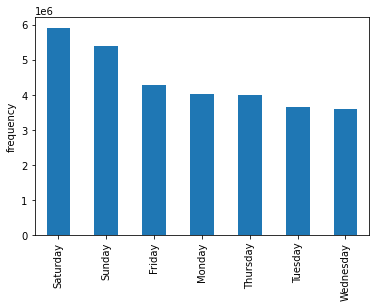

In [65]:
#What are the busiest days of the week?

bar= orders_prods_all_clean['weekday'].value_counts().plot.bar()
plt.ylabel('frequency')

In [66]:
# Export bar chart

bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'busiest_days_of_week.png'))

Text(0, 0.5, 'frequency')

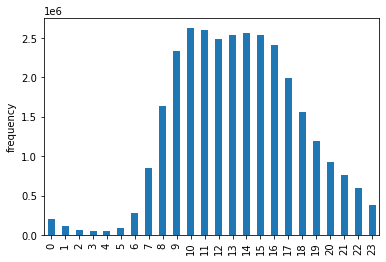

In [67]:
# Create frequency chart for busiest time of the day. Each data point is part of an order so the frequency shows the number of items ordered at different times of the day

bar_2 =  orders_prods_all_clean['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.ylabel('frequency')

In [68]:
# Export bar chart

bar_2.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'busiest_hours_of_the_day.png'))

In [69]:
orders_prods_all_clean.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest day', 'busiest days of the week',
       'busiest hours of the day', 'max_order', 'loyalty_flag',
       'users_average_order', 'spending_flag', 'users_days_since_order',
       'Order_frequency_flag', 'Gender', 'State', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', '_merge', 'Region',
       'activity_flag', 'generation', 'income_level', 'parent',
       'department_name', 'weekday'],
      dtype='object')

Text(0, 0.5, 'frequency')

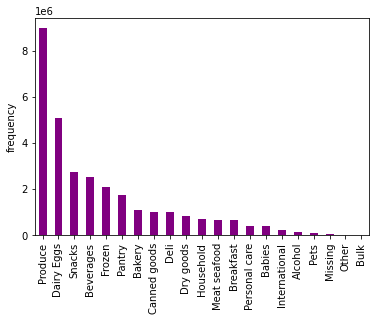

In [70]:
# Create bar chart to visualize order frequency by department

bar_3 = orders_prods_all_clean['department_name'].value_counts().plot.bar(color = 'purple')
plt.ylabel('frequency')

In [71]:
bar_3.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'orders_by_department.png'))

Text(0, 0.5, '')

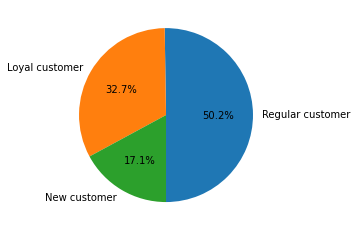

In [72]:
# Showing pie chart of customers based on loyalty status. autopct='%1.1f%%' to show percentage and plt.ylabel('') to remove column name from chart. Pie chart because 3 categories.

pie_1 = orders_prods_all_clean['loyalty_flag'].value_counts().plot.pie(autopct='%1.1f%%',startangle=270,)
plt.ylabel('')

In [73]:
pie_1.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Loyalty_Pie_Chart.png'))

In [74]:
# Create crosstab of 'order_frequency_flag' and 'loyalty_flag'

loyalty_and_spending_flags = pd.crosstab(orders_prods_all_clean['Order_frequency_flag'], orders_prods_all_clean['loyalty_flag'], dropna = False)

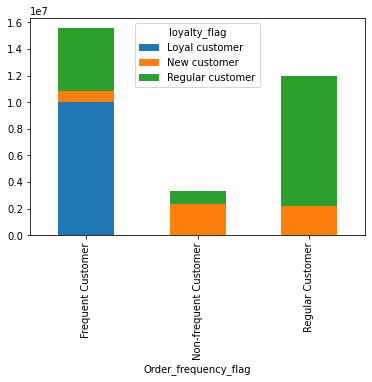

In [75]:
# Create a stacked bar chart - frequency_flag counts grouped by loyalty_flag

bar_4 = loyalty_and_spending_flags.plot(kind = 'bar', stacked = True)

In [76]:
bar_4.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_and_spending.png'))

In [77]:
# Create crosstab between 'department_name' and 'loyalty_flag'

dept_name_and_loyalty = pd.crosstab(orders_prods_all_clean['department_name'], orders_prods_all_clean['loyalty_flag'], dropna = False)

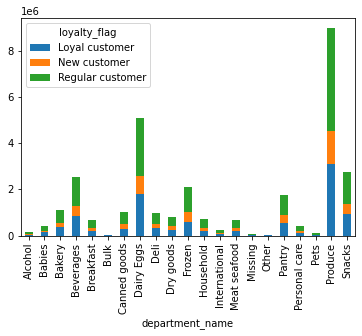

In [78]:
# Create stacked bar chart - department_name counts by loyalty_flag

bar_5 = dept_name_and_loyalty.plot(kind = 'bar', stacked = True)

In [79]:
bar_5.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_and_department_freq.png'))

In [80]:
# Create crosstab between 'department_name' and 'region'. Can normalize w index argument

dept_name_and_region = pd.crosstab(orders_prods_all_clean['department_name'], orders_prods_all_clean['Region'], normalize='index')

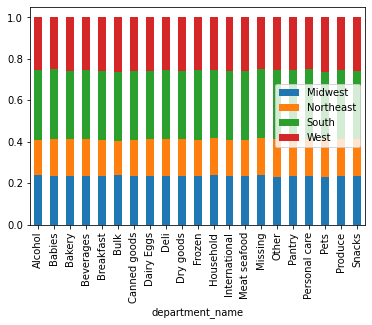

In [81]:
# Create 100% stacked bar chart with department names by region

bar_6 = dept_name_and_region.plot(kind='bar', stacked = True)
plt.legend(loc='right')

In [82]:
bar_6.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'department_and_region.png'))

In [83]:
# Create a crosstab between department_name and parent

dept_name_and_parent_status = pd.crosstab(orders_prods_all_clean['department_name'], orders_prods_all_clean['parent'], dropna = False)

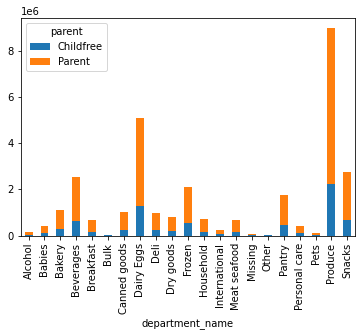

In [84]:
# Create a stacked bar chart - department name by parent status

bar_7 = dept_name_and_parent_status.plot(kind = 'bar', stacked = True)

In [85]:
bar_7.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'department_and_parent_status.png'))

In [86]:
# Create a crosstab between department_name and income_level

dept_name_and_income = pd.crosstab(orders_prods_all_clean['department_name'], orders_prods_all_clean['income_level'], dropna = False)

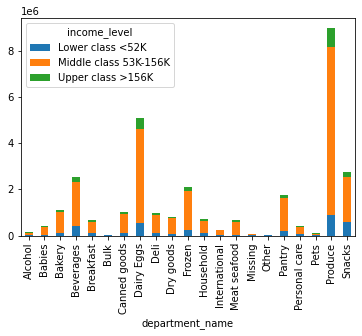

In [87]:
# Create a stacked bar chart - department_name by income level

bar_8 = dept_name_and_income.plot(kind = 'bar', stacked = True)

In [88]:
bar_8.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'department_and_income_level.png'))

In [89]:
# Create a crosstab between department_name and Age/generation

dept_name_and_age = pd.crosstab(orders_prods_all_clean['department_name'], orders_prods_all_clean['generation'], dropna = False)

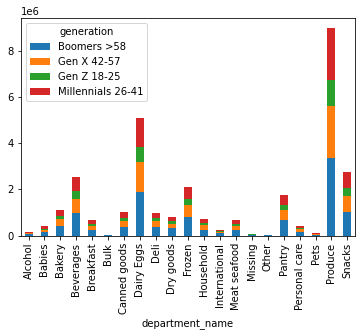

In [90]:
# Create a stacked bar chart - department_name by income level

bar_9 = dept_name_and_age.plot(kind = 'bar', stacked = True)

In [91]:
bar_9.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'department_and_age.png'))

In [92]:
# Create a crosstab- spending flag and generation

spending_and_income = pd.crosstab(orders_prods_all_clean['spending_flag'], orders_prods_all_clean['income_level'], dropna = False)

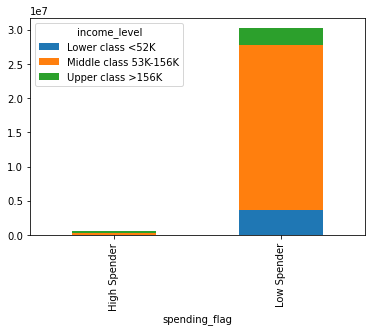

In [93]:
# Create a stacked bar chart

bar_10 = spending_and_income.plot(kind = 'bar', stacked = True)

In [94]:
bar_10.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'income_and_spending.png'))

In [95]:
# Create a crosstab 

spending_and_parent = pd.crosstab(orders_prods_all_clean['loyalty_flag'], orders_prods_all_clean['parent'], dropna = False)

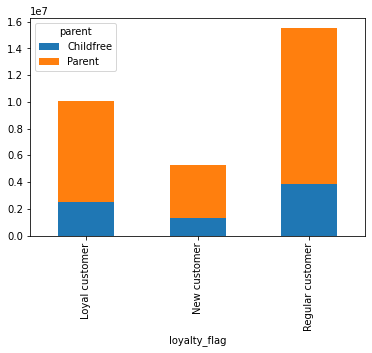

In [96]:
# Create a stacked bar chart 

bar_11 = spending_and_parent.plot(kind = 'bar', stacked = True)

In [97]:
bar_11.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'loyalty_and_parent_status.png'))

# Export Data

In [99]:
orders_prods_all_clean.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_prods_all_clean.pkl'))